In [1]:
import pandas             as pd
import numpy              as np
import pylab              as pl
from   scipy.spatial      import Delaunay
from   astropy.table      import Table

In [2]:
data = Table.read('./data/gama_gold_ddp.fits')

In [3]:
rot_xyz_labels = ['ROTCARTESIAN_X','ROTCARTESIAN_Y','ROTCARTESIAN_Z']
df_pos = data[rot_xyz_labels].to_pandas()
rot_xyz = np.array(df_pos)

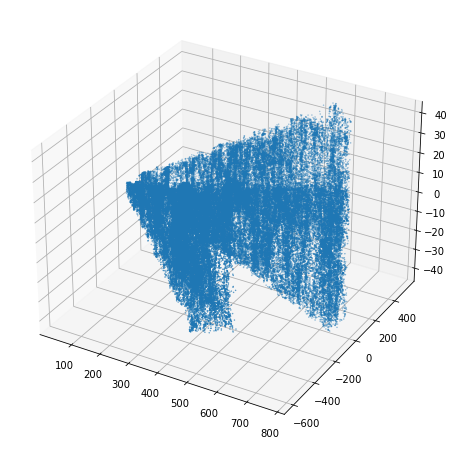

In [4]:
fig = pl.figure(figsize=(8,8), rasterized=True)
ax = pl.axes(projection='3d')
ax.scatter3D(rot_xyz[:,0], rot_xyz[:,1], rot_xyz[:,2], s=0.2)

In [5]:
G15 = np.array(data['FIELD'], dtype=str)
ii_G15 = G15 == 'G15'
ii_G15

array([False, False,  True, ..., False,  True, False])

In [6]:
DDP = np.array(data['DDP'])
ii_DDP1 = DDP[:,0] == 1 
df_pos_DDP1 = df_pos[ii_DDP1 & ii_G15]
rot_xyz_ddp1 = rot_xyz[ii_DDP1 & ii_G15]

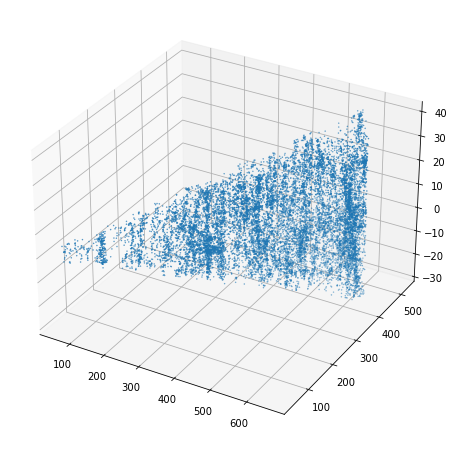

In [7]:
fig = pl.figure(figsize=(8,8), rasterized=True)
ax = pl.axes(projection='3d')
ax.scatter3D(rot_xyz_ddp1[:,0], rot_xyz_ddp1[:,1], rot_xyz_ddp1[:,2], s=0.2)

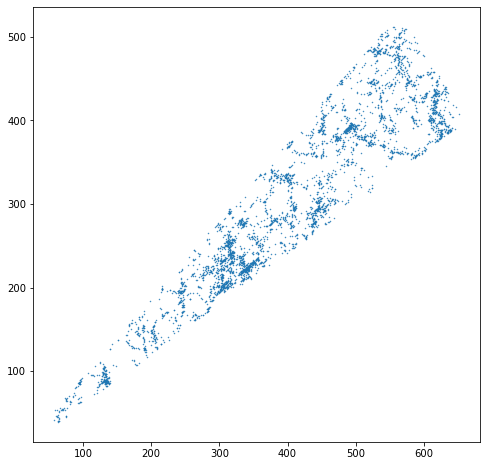

In [8]:
fig = pl.figure(figsize=(8,8), rasterized=True)
is_slice = (rot_xyz_ddp1[:,2]>-5) & (rot_xyz_ddp1[:,2]<5)
pl.scatter(rot_xyz_ddp1[:,0][is_slice], rot_xyz_ddp1[:,1][is_slice], s=0.2)

In [9]:
test_pos = np.c_[rot_xyz_ddp1[:,0][is_slice], rot_xyz_ddp1[:,1][is_slice]]
test_pos

array([[405.86038402, 283.90862623],
       [321.42086185, 255.41947976],
       [451.50317643, 298.94819368],
       ...,
       [451.38104426, 404.75828724],
       [276.45075662, 210.85112595],
       [395.10984945, 333.19191631]])

In [10]:
tri = Delaunay(test_pos)

simplices = tri.simplices
simplices

array([[2687, 1240, 3868],
       [3347,  565, 3868],
       [3549, 4054,  172],
       ...,
       [2526, 2714, 2080],
       [2526, 1539,  276],
       [2526, 2080, 1539]], dtype=int32)

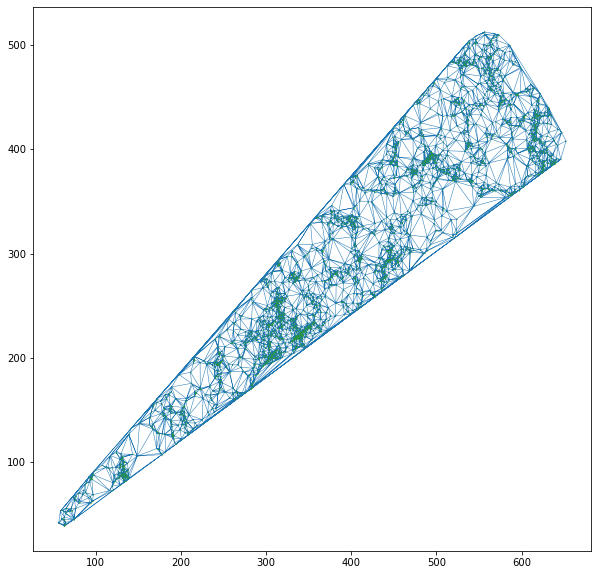

In [11]:
fig, ax = pl.subplots(1,1,figsize=(10,10))
pl.triplot(test_pos[:,0], test_pos[:,1], simplices, lw=0.5)
pl.plot(test_pos[:,0], test_pos[:,1], 'o', markersize=0.2)

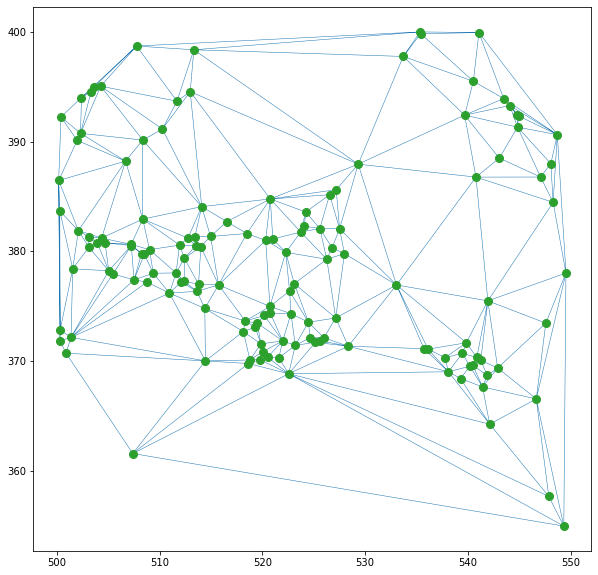

In [12]:
fig, ax = pl.subplots(1,1,figsize=(10,10))
is_zoom = (test_pos[:,0]>500) & (test_pos[:,0]<550) & (test_pos[:,1]>350) & (test_pos[:,1]<400)
pl.triplot(test_pos[:,0][is_zoom], test_pos[:,1][is_zoom], lw=0.5)
pl.plot(test_pos[:,0][is_zoom], test_pos[:,1][is_zoom], 'o', markersize=8)

In [13]:
rot_xyz_labels = ['ROTCARTESIAN_X','ROTCARTESIAN_Y','ROTCARTESIAN_Z']
df_pos = data[rot_xyz_labels].to_pandas()
df_pos

,ROTCARTESIAN_X,ROTCARTESIAN_Y,ROTCARTESIAN_Z
0,360.247776,-326.165420,11.395235
1,117.562961,-10.185777,0.080162
2,553.820302,392.914451,0.936551
3,121.811730,91.147549,1.527326
4,463.335039,-490.195602,-6.128962
...,...,...,...
121970,395.109849,333.191916,3.537985
121971,384.662170,279.166617,1.037473
121972,347.559951,-324.174592,20.962574
121973,285.037997,178.061442,8.120886


In [14]:
df_pos_DDP1 = df_pos[ii_DDP1 & ii_G15]
df_pos_DDP1

,ROTCARTESIAN_X,ROTCARTESIAN_Y,ROTCARTESIAN_Z
10,376.361051,259.703020,-14.427125
24,609.593909,452.947333,-16.324600
30,378.189443,337.250361,24.247832
31,405.860384,283.908626,4.539176
53,467.229273,373.702543,-10.689510
...,...,...,...
121914,315.898864,247.876021,-13.606974
121929,276.450757,210.851126,0.188152
121933,358.783727,226.700636,8.862379
121954,636.725030,393.194120,-22.706112


In [15]:
df_pos_DDP1_slice = df_pos[ii_DDP1 & ii_G15][is_slice]
df_pos_DDP1_slice

,ROTCARTESIAN_X,ROTCARTESIAN_Y,ROTCARTESIAN_Z
31,405.860384,283.908626,4.539176
66,321.420862,255.419480,-1.943113
97,451.503176,298.948194,-1.092487
158,407.886225,297.105735,-0.760675
167,560.308615,456.945568,-2.353501
...,...,...,...
121792,458.778233,409.239769,-4.381725
121798,191.052109,125.472437,-0.494581
121880,451.381044,404.758287,4.674577
121929,276.450757,210.851126,0.188152


In [16]:
idx = np.arange(0,len(df_pos_DDP1_slice))
idx

array([   0,    1,    2, ..., 4089, 4090, 4091])

In [17]:
# np.savetxt('./data/GAMA_rotpos_ddp1_gr15_slice.txt', np.c_[idx,df_pos_DDP1_slice.values] , fmt='%d', header='id px py pz')
np.savetxt('./data/GAMA_rotxy_ddp1_gr15_slice.txt', np.c_[idx, df_pos_DDP1_slice[['ROTCARTESIAN_X','ROTCARTESIAN_Y']].values] , fmt='%d', header='id px py')

In [18]:
len(idx)

4092

In [19]:
f = open('./data/GAMA_rotxy_ddp1_gr15_slice.txt.NDnet_s3.5_manifolds_JE0ad1ad2ad.NDnet.a.NDnet')
doc = f.readlines()

In [20]:
N_vertex = int(doc[4])
N_vertex

3417

In [21]:
vortices = np.array([np.array( i.replace('\n','').split(' '), dtype=int ) for i in doc[5 : N_vertex + 5]])
vortices = np.unique(vortices)
# vortices

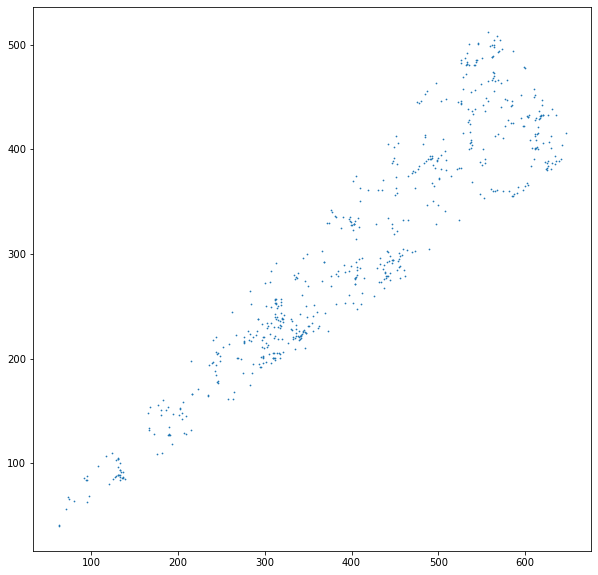

In [22]:
pl.figure(figsize=(10,10))
pl.scatter( test_pos[vortices][:,0], test_pos[vortices][:,1], s=0.5)

In [23]:
N_simplex1 = int(doc[N_vertex+5].replace('\n','').split(' ')[1])
N_simplex1

847

In [39]:
simplex_1 = np.array([np.array( i.replace('\n','').split(' '), dtype=int ) for i in doc[N_vertex+6 : N_vertex + 6 + N_simplex1]])
print(simplex_1)
print(len(simplex_1))
# print(np.ravel(simplex_1))
print(len(np.unique(np.ravel(simplex_1))))
simplex_1 = np.unique(simplex_1)

[[ 254  256]
 [ 882 2902]
 [2900 2903]
 ...
 [3340 3350]
 [ 963 3358]
 [3316 3386]]
847
839


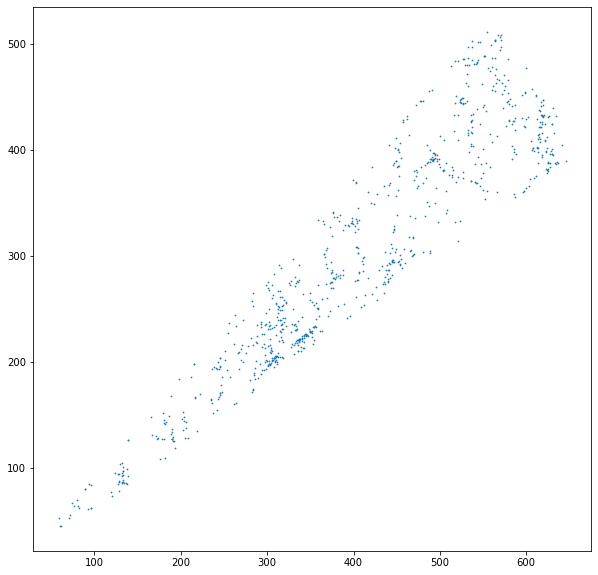

In [26]:
pl.figure(figsize=(10,10))
pl.scatter(test_pos[simplex_1][:,0], test_pos[simplex_1][:,1], s=0.5)

In [ ]:
f = open('./data/GAMA_rotxy_ddp1_gr15_slice.txt.NDnet_s3.5_manifolds_JE0ad1ad2ad.NDnet.a.NDnet')
doc = f.readlines()
doc = np.array(doc)
ii = np.where(doc=='[FILAMENTS]\n')[0][0]
N_fila = int(doc[ii+1])
print(N_fila)
FILA = np.zeros(N_fila, dtype=object)
jj = ii+2
# print(doc[jj][0].replace('\n','').split(' ')[2])
fig = pl.figure(figsize=(8,8), rasterized=True)
for i in range(N_fila):
    jj_new = jj + int(doc[jj].replace('\n','').split(' ')[2]) + 1
    FILA[i] = np.array([a.replace('\n','').split(' ')[1:] for a in doc[jj+1:jj_new]], dtype=float)
    pl.plot(FILA[i][:,0], FILA[i][:,1], lw=1) 
    jj = jj_new
pl.scatter(test_pos[ii_0_simplex][:,0], test_pos[ii_0_simplex][:,1], s=4)

IndexError: index 0 is out of bounds for axis 0 with size 0

In [114]:
N_simplex2 = int(doc[N_vertex + 6 + N_simplex1].replace('\n','').split(' ')[1])
N_simplex2

6811

In [124]:
simplex_2 = np.array([np.array( i.replace('\n','').split(' '), dtype=int ) for i in doc[N_vertex + 6 + N_simplex1 + 1 :  N_vertex + 6 + N_simplex1 + N_simplex2]])

In [129]:
simplex_2

array([[ 258, 1008, 1011],
       [1183,    0, 1182],
       [1785,  505,  506],
       ...,
       [3416, 3415, 3406],
       [3413,  937, 3415],
       [3413, 3416, 3375]])

In [133]:
simplex_2 = np.unique(simplex_2)

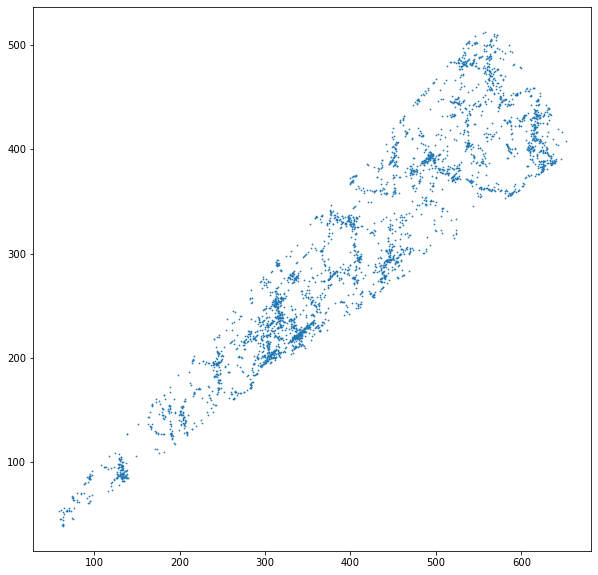

In [116]:
pl.figure(figsize=(10,10))
pl.scatter( test_pos[simplex_2][:,0], test_pos[simplex_2][:,1], s=0.5)

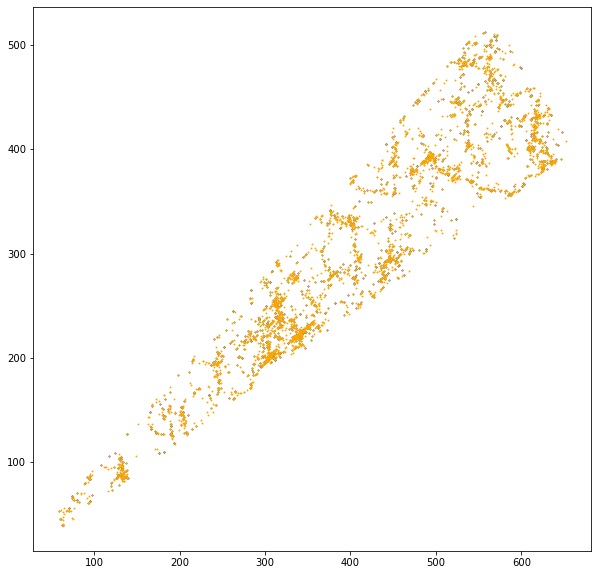

In [117]:
pl.figure(figsize=(10,10))
pl.scatter( test_pos[vortices][:,0], test_pos[vortices][:,1], s=0.7, c='b')
pl.scatter( test_pos[simplex_1][:,0], test_pos[simplex_1][:,1], s=0.7, c='g')
pl.scatter( test_pos[simplex_2][:,0], test_pos[simplex_2][:,1], s=0.7, c='orange')

In [134]:
all_index = np.concatenate([simplex_1,simplex_2])
len(all_index)

4256

In [135]:
unique_index = np.unique(all_index)
len(unique_index)

3417

In [137]:
np.array([np.array( i.replace('\n','').split(' '), dtype=int ) for i in doc[N_vertex+6 : N_vertex + 6 + N_simplex1]])

array([[ 254,  256],
       [ 882, 2902],
       [2900, 2903],
       ...,
       [3340, 3350],
       [ 963, 3358],
       [3316, 3386]])

In [139]:
unique_index

array([   0,    1,    2, ..., 3414, 3415, 3416])